# 1. K-NN classifier

**Question** How does the k-nn algorithm work?

**Question** What are the parameters we need to choose to classify with k-NN? How can we choose them

**Question** What are the advantages and disadvantages of this algorithm? For which kind of dataset it would be appropriate and for which datasets it wouldn't?

**Question** How can we deal with nominal values in distance measurement?


In further part of the laboratory, we will perform a preprocessing of the data and a classification of a set of biomedical voice measurements. Some of them has been recorded for people with Parkinson's desease.

More about the dataset: https://archive.ics.uci.edu/ml/datasets/parkinsons

First, we load the required packages:

In [23]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# 2. Data loading and analysis of the attributes
Let's start with the data preparation, 
#### 2.1. Load the dataset from file parkinsons.csv into data frame using library pandas (pd.read_csv). Write the body of the read_data function to return a data frame with attributes and a list with class labels. Classes are available in 'status' column. You should also remove column 'name' from the data (see function drop of dataFrame https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [24]:
def read_data(path):
    data = pd.read_csv(path)
    data = data.drop(columns=['name']) # Features
    data_X = data.drop(columns=['status']) # Class labels
    data_Y = data['status']
    return data_X, data_Y.tolist()

data_X, data_Y = read_data("parkinsons.data")

Let's see what we have loaded.

In [25]:
data_X.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [26]:
print(data_Y)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 1.2. Let's analyse the given data. 
* How many attributes are in given data?
* Are the attributes on the common scale?
* Are observations equally distributed for sick and healthy people?

Plot the histogram of the assigned class and analyse the distribution.


Number of attributes: 22
Attribute ranges:
      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
min       88.333       102.145        65.476         0.00168   
max      260.105       592.030       239.170         0.03316   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
min          0.000007   0.00068   0.00092     0.00204       0.00954   
max          0.000260   0.02144   0.01958     0.06433       0.11908   

     MDVP:Shimmer(dB)  ...  MDVP:APQ  Shimmer:DDA      NHR     HNR      RPDE  \
min             0.085  ...   0.00719      0.01364  0.00065   8.441  0.256570   
max             1.302  ...   0.13778      0.16942  0.31482  33.047  0.685151   

          DFA   spread1   spread2        D2       PPE  
min  0.574282 -7.964984  0.006274  1.423287  0.044539  
max  0.825288 -2.434031  0.450493  3.671155  0.527367  

[2 rows x 22 columns]
Answer: No, they aren't on a common scale. We need to normalize
Class distribution:
 1    147
0     48
Name: count, d

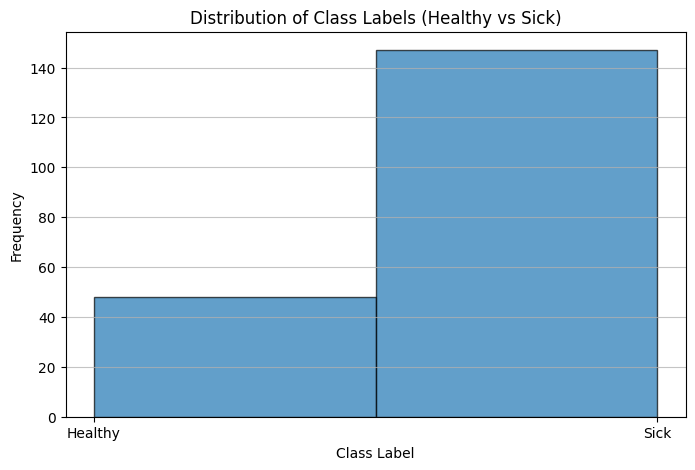

In [27]:
# How many attributes are in the given data?
num_attributes = data_X.shape[1]  # Number of columns in data_X

# Are the attributes on a common scale?
attribute_ranges = data_X.describe().loc[['min', 'max']]

# Are observations equally distributed for sick and healthy people?
class_distribution = pd.Series(data_Y).value_counts()

# Print analysis results
print(f"Number of attributes: {num_attributes}")
print("Attribute ranges:\n", attribute_ranges)
print("Answer: No, they aren't on a common scale. We need to normalize")
print("Class distribution:\n", class_distribution)

# d. Plot the histogram of the assigned class
plt.figure(figsize=(8, 5))
plt.hist(data_Y, bins=2, edgecolor='black', alpha=0.7)
plt.xticks([0, 1], ['Healthy', 'Sick'])
plt.title('Distribution of Class Labels (Healthy vs Sick)')
plt.xlabel('Class Label')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

Plot the histograms of the first 5 attributes. 

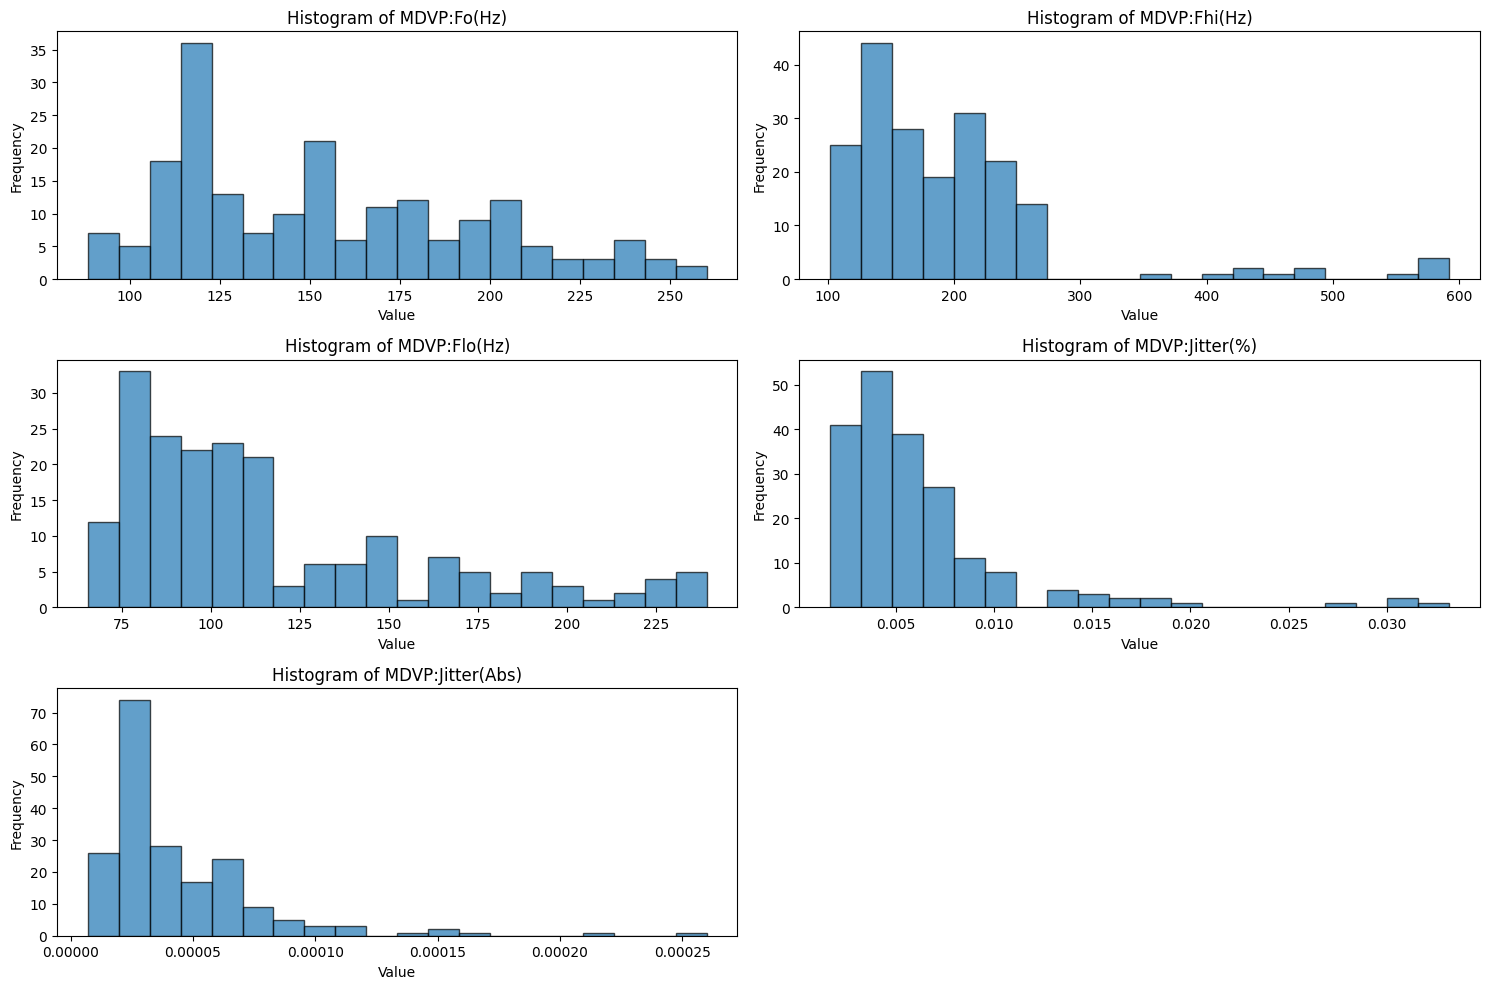

In [28]:
plt.figure(figsize=(15, 10))

for i in range(5):
    plt.subplot(3, 2, i + 1)
    plt.hist(data_X.iloc[:, i], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {data_X.columns[i]}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Train and test set selection

#### We want to build our classifier and test it on another set of observations.

To split data into train and test sets use train_test_split method from sklearn.model_selection module (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). Use 80% of cases in train set and 20% in test set. 
Use random_state = 5 just to be sure we all have the same rows in train and test sets :)

split_data should return a tuple containing: dataframe with train set attributes, list of labels for train data, dataframe with test set attributes and a list of labels for test data.

In [29]:
def split_data(data_X, data_Y, test_percent=20, random_state=5):
    train_X, test_X, train_Y, test_Y = train_test_split(data_X, data_Y, test_size=test_percent/100, random_state=random_state)
    return train_X, train_Y, test_X, test_Y
    
(train_X, train_Y, test_X, test_Y) = split_data(data_X, data_Y)
print("rows in train set:", train_X.shape[0])
print("rows in test set:", test_X.shape[0])

rows in train set: 156
rows in test set: 39


# 4. Data standarization/normalization
#### 4.1. Use k-nn algorithm to classify the obtained test set using k=3. What is the accuracy of the classification?

Use KNeighborsClassifier class from sklearn.neighbors module. Useful methods: fit and predict. Classification accuracy can be obtained with accuracy_score method from sklearn.metrics. Function get_classification_accuracy should return the accuracy of classification of given test set on model build with train set.

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [30]:
def get_classification_accuracy(train_data_X, train_data_Y, test_data_X, test_data_Y, k = 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data_X, train_data_Y)
    predictions = knn.predict(test_data_X)
    accuracy = metrics.accuracy_score(test_data_Y, predictions)
    return accuracy

get_classification_accuracy(train_X, train_Y, test_X, test_Y)

0.8461538461538461

#### 4.2. Perform some normalization or standarization of attributes. Then repeat the classification. Do the classification accuracy change?

You can use sklearn.preprocessing.StandardScaler, sklearn.preprocessing.MinMaxScaler or sklearn.preprocessing.MaxAbsScaler and their fit_transform/transform methods.

Try other standarization methods to verify the standarization procedure influence the classification accuracy.
standarize_train_and_test should return 2 dataFrames - with normalized train and normalized test sets.

In [31]:
def standarize_train_and_test(train_X, test_X):
    scaler = preprocessing.StandardScaler() # Or MinMaxScaler() or MaxAbsScaler()
    norm_train_X = scaler.fit_transform(train_X)
    norm_test_X = scaler.transform(test_X)
    norm_train_X = pd.DataFrame(norm_train_X, columns=train_X.columns)
    norm_test_X = pd.DataFrame(norm_test_X, columns=test_X.columns)

    return norm_train_X, norm_test_X

norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)
get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y)

0.9743589743589743

# 5. Choosing k value
Using obtained in previous exercices train set with normalization/standarization use k-nn algoritm using k from 1 to 20. Use 5-fold cross-validation within the train set to obtain the classification accuracy. Plot the obtained accuracy of the classification. Which k value seems to be the best for the given dataset?

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html for more info about cross validation in sklearn.

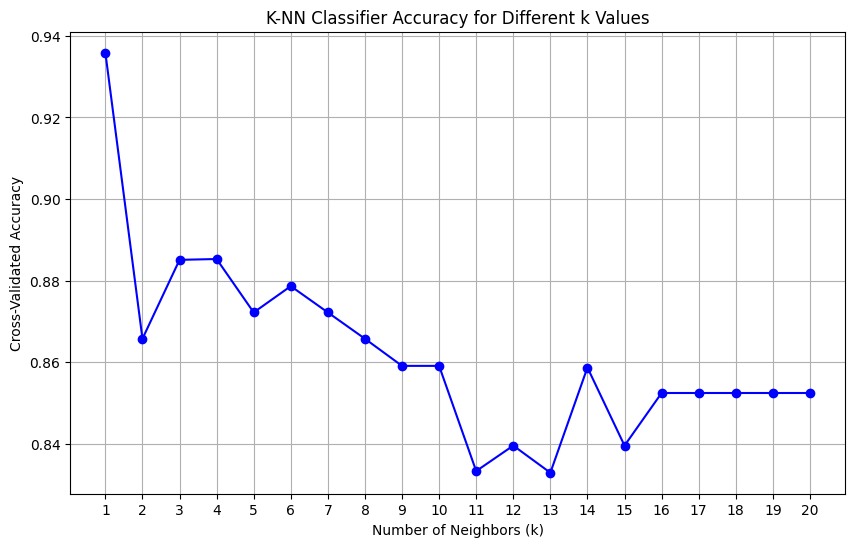

The best k value is: 1 with accuracy: 0.94


In [32]:
def choose_best_k(train_X, train_Y):
    k_values = range(1, 21)
    accuracies = []
    
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, train_X, train_Y, cv=5, scoring='accuracy')
        accuracies.append(scores.mean())    
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
    plt.title('K-NN Classifier Accuracy for Different k Values')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Cross-Validated Accuracy')
    plt.xticks(k_values)
    plt.grid()
    plt.show()

    best_k = k_values[np.argmax(accuracies)]
    print(f"The best k value is: {best_k} with accuracy: {max(accuracies):.2f}")

    return best_k

best_k = choose_best_k(norm_train_X, train_Y)


# 6. Testing classifier
Train the k-NN classifier again and test it using the obtained best k value on a test set to check the final classification accuracy. You can just call the previous written function get_classification_accuracy)

In [33]:
accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
print(f"Final classification accuracy on test set with k={best_k}: {accuracy:.2f}")

Final classification accuracy on test set with k=1: 0.97


# 7. Homework
You are given a dataset containing information about 1600 red wines (winequality.csv) containing 11 attributes and assignment to one of the three wine quality classess: "poor", "medium" and "good". Perform a preprocessing of this dataset (normalization, standardization). Divide this set into the train and test sets. Choose experimentally the best value of k (using cross-validation) and perform classification using the  k-nn algoritm with the chosen k value. Write a report containing information about the used preprocessing methods, chosen train/test split method (percentage of examples in train/test sets, if shuffling or stratification used), plot of the accuracy depending of k parameter, finally chosen k and obtained classification accuracy on a test set.

**Deadline +2 weeks**
    
    

In [35]:
wine_data = pd.read_csv("winequality-red.csv")
# Load and inspect the data
print(wine_data.head())
print(wine_data['quality'].value_counts())  # Check class distribution in 'quality' column

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4    poor  
1      9.8    poor  
2      9.8    poor  
3 

Let's separate features and labels

In [36]:
data_X = wine_data.drop(columns=['quality'])
data_Y = wine_data['quality']

And then split the data into training and test sets, using an 80:20 ratio. This function, defined in an earlier cell, randomly assigns 80% of the data to the training set and the remaining 20% to the test set. This 4:1 ratio is commonly used in classification algorithms, including k-NN, to ensure the model has enough data to learn while retaining a portion for evaluation.

In [37]:
train_X, train_Y, test_X, test_Y = split_data(data_X, data_Y)

I used StandardScaler() for standardization, which scales the features so they have a mean of 0 and a standard deviation of 1. This helps ensure that all attributes contribute equally to the model, making it particularly useful for distance-based algorithms like k-NN.

In [38]:
norm_train_X, norm_test_X = standarize_train_and_test(train_X, test_X)

Next, let's select the optimal k value using cross-validation, leveraging the function I defined earlier.

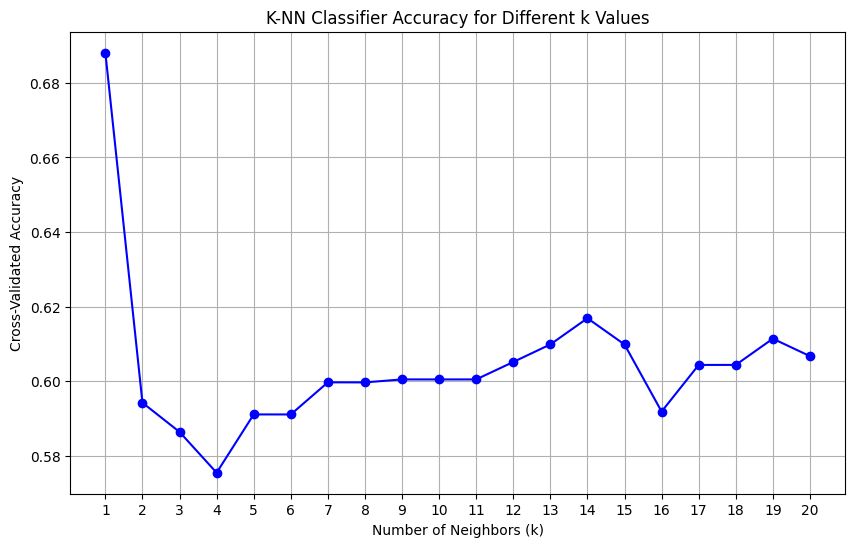

The best k value is: 1 with accuracy: 0.69


In [39]:
best_k = choose_best_k(norm_train_X, train_Y)

Finally, I will evaluate how the algorithm performs on the test dataset.

In [40]:
accuracy = get_classification_accuracy(norm_train_X, train_Y, norm_test_X, test_Y, k=best_k)
print(f"Final classification accuracy on test set with k={best_k}: {accuracy:.2f}")

Final classification accuracy on test set with k=1: 0.67


## Summary
The final accuracy is 0.67, which is twice as good as assigning classes randomly. However, this is still too low for practical use. To improve performance, gathering more data or dropping columns that may add noise could help enhance the classifier's effectiveness.